In [110]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math


In [111]:
df = pd.read_csv(r'C:\Users\HP\Desktop\titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# ANALYZING THE DATA

<Axes: xlabel='Survived', ylabel='count'>

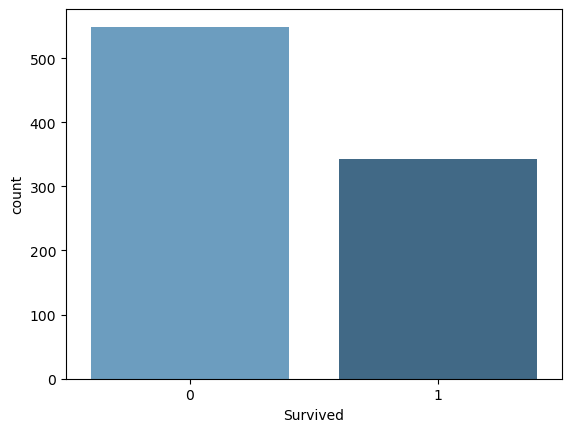

In [112]:
sns.countplot(x = 'Survived', data = df, palette = 'Blues_d')
# analyzing the no of people survived

<Axes: xlabel='Survived', ylabel='count'>

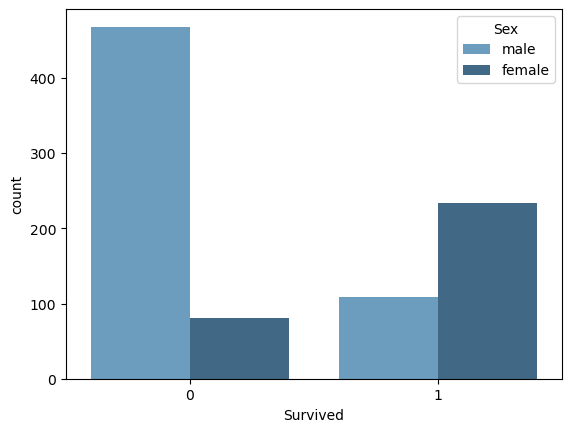

In [113]:
sns.countplot(x = 'Survived', data = df, hue = 'Sex', palette = 'Blues_d')
# analyzing the no of people survived on the basis of sex

<Axes: xlabel='Survived', ylabel='count'>

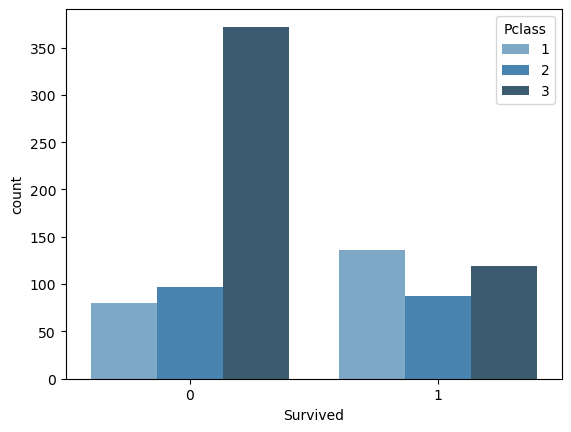

In [114]:
sns.countplot(x = 'Survived', data = df ,hue = 'Pclass', palette = 'Blues_d')
# analyzing the no of people survived on the basis of their passenger class

<Axes: ylabel='Frequency'>

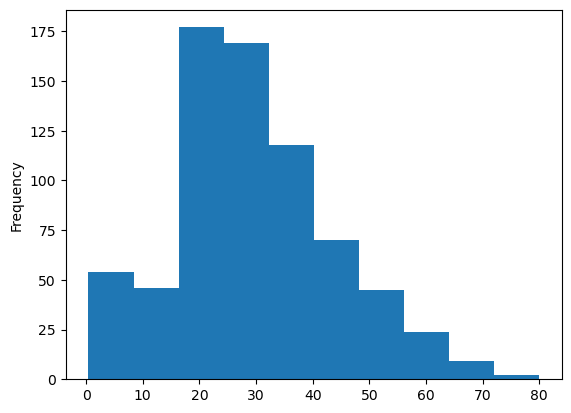

In [115]:
df['Age'].plot.hist()
# analyzing the ages of the passenger

<Axes: xlabel='SibSp', ylabel='count'>

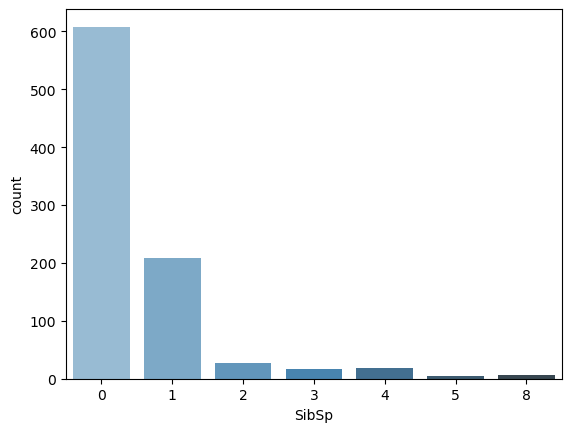

In [116]:
sns.countplot(x = 'SibSp', data = df , palette = 'Blues_d')
# analyzing the no of sibling boarded 

<Axes: xlabel='Parch', ylabel='count'>

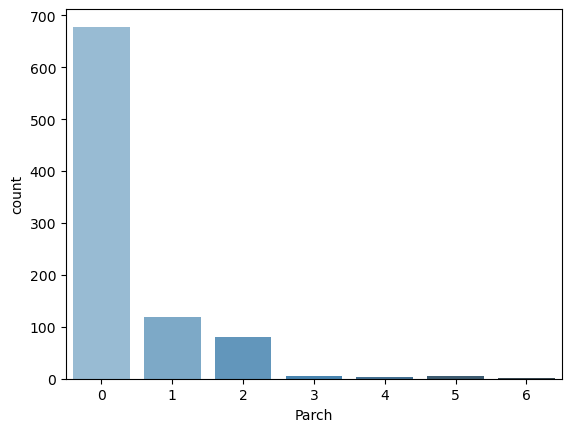

In [117]:
sns.countplot(x = 'Parch', data = df , palette = 'Blues_d')
# analyzing the no of parents or children boarded

In [118]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


# DATA WRANGLING

In [119]:
df.isnull().sum()
# checking for the null values

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [120]:
df.drop('Cabin',axis = 1 , inplace = True)
# droping the Cabin column as it has lot of NAN values

In [121]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [122]:
df.dropna(inplace = True)
# dropping all the null values

In [123]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [124]:
 sex = pd.get_dummies(df["Sex"],drop_first = True)
sex.head()


,male
0,1
1,0
2,0
3,0
4,1


In [125]:
embarked = pd.get_dummies(df["Embarked"],drop_first = True)
embarked.head()

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [126]:
pcl = pd.get_dummies(df["Pclass"],drop_first = True)
pcl.head()

,2,3
0,0,1
1,0,0
2,0,1
3,0,0
4,0,1


In [128]:
df = pd.concat([df,sex,embarked,pcl], axis = 1)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S,2,3
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,0,1,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0,0,1,0,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,0,1,0,1


In [129]:
df1 = df.drop(['PassengerId','Pclass','Name','Sex','Ticket','Embarked'],axis = 1)
df1.head()

,Survived,Age,SibSp,Parch,Fare,male,Q,S,2,3
0,0,22.0,1,0,7.2500,1,0,1,0,1
1,1,38.0,1,0,71.2833,0,0,0,0,0
2,1,26.0,0,0,7.9250,0,0,1,0,1
3,1,35.0,1,0,53.1000,0,0,1,0,0
4,0,35.0,0,0,8.0500,1,0,1,0,1


# TRAIN DATA

In [147]:
x = df1.drop('Survived',axis = 1)
y = df1['Survived']

In [159]:
x.columns = x.columns.astype(str) # converting the columns heading to str type 

In [160]:
from sklearn.model_selection import train_test_split

In [161]:
 X_train, X_test, y_train, y_test  = train_test_split(x,y,test_size = 0.3,random_state = 1)

In [162]:
from sklearn.linear_model import LogisticRegression

In [163]:
reg = LogisticRegression()

In [164]:
reg.fit(X_train,y_train)

C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [166]:
predictions = reg.predict(X_test)

In [168]:
reg.score(X_test,y_test)

0.7710280373831776

In [169]:
from sklearn.metrics import classification_report

In [173]:
classification_report(y_test,predictions)
# getting all the scores of the model

'              precision    recall  f1-score   support\n\n           0       0.80      0.81      0.81       126\n           1       0.72      0.72      0.72        88\n\n    accuracy                           0.77       214\n   macro avg       0.76      0.76      0.76       214\nweighted avg       0.77      0.77      0.77       214\n'

In [174]:
from sklearn.metrics import confusion_matrix

In [175]:
confusion_matrix(y_test,predictions)
# making the confusion matrix 

array([[102,  24],
       [ 25,  63]], dtype=int64)

In [176]:
from sklearn.metrics import accuracy_score

In [177]:
accuracy_score(y_test,predictions)
# getting the accuracy score of the model

0.7710280373831776